![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [43]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu
import seaborn as sns

In [16]:
# Load the mens_results csv into Pandas Dataframe
men_df = pd.read_csv('datasets/men_results.csv')

# Display results
men_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly
...,...,...,...,...,...,...,...
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly


In [17]:
# Check data types
men_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [18]:
# # Check to see the number of FIFA World Cup tournament
men_df['tournament'].value_counts() 

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

In [19]:
# Load in the women_results csv into Pandas dataframe
women_df = pd.read_csv('datasets/women_results.csv')

# Display results
women_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship
...,...,...,...,...,...,...,...
4879,4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro
4880,4880,2022-07-23,France,Netherlands,1,0,UEFA Euro
4881,4881,2022-07-26,England,Sweden,4,0,UEFA Euro
4882,4882,2022-07-27,Germany,France,2,1,UEFA Euro


In [20]:
# Check data types
women_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [21]:
# Check to see the number of FIFA World Cup tournaments
women_df['tournament'].value_counts()

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

In [22]:
# Filter for FIFA World Cup matches in men_df
men_df = men_df[men_df['tournament'] == 'FIFA World Cup']

# Display the results
men_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1311,1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup
1312,1312,1930-07-13,France,Mexico,4,1,FIFA World Cup
1313,1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup
1314,1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup
1315,1315,1930-07-15,Argentina,France,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [23]:
# Convert date column to datetime
men_df['date'] = pd.to_datetime(men_df['date'])

# Filter for matches after 2002-01-01
men_df = men_df[men_df['date'] > '2002-01-01']

# Display the results
men_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [27]:
# Filter for FIFA World Cup matches in women_df
women_df = women_df[women_df['tournament'] == 'FIFA World Cup']

# Display the results
women_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
...,...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup,3
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3


In [28]:
# Convert date column to datetime
women_df['date'] = pd.to_datetime(women_df['date'])

# Filter for matches after 2002-01-01
women_df = women_df[women_df['date'] > '2002-01-01']

# Display the results
women_df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
...,...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup,3
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3


In [31]:
# Check the sample size of each group
men_sample_size = len(men_df)
women_sample_size = len(women_df)

# Display the sample sizes for both groups
print("Sample size of women's group:", women_sample_size)
print("Sample size of men's group:", men_sample_size)

Sample size of women's group: 200
Sample size of men's group: 384


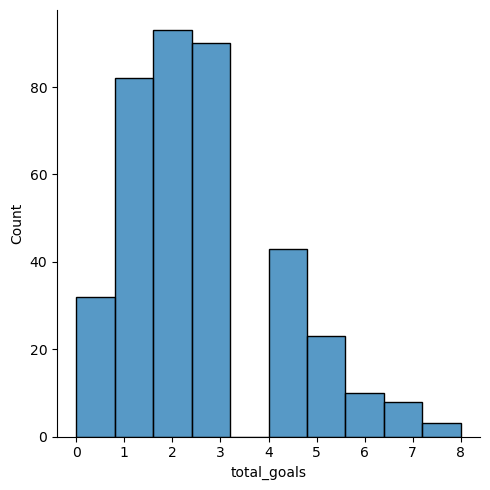

In [44]:
# Calculate the total number of goals score in each match in men_df
men_df['total_goals'] = men_df['home_score'] + men_df['away_score']

# Plot histogram for men_df
sns.displot(men_df['total_goals'], bins=10)

Text(0.5, 1.0, "Distribution of Goals Scored in Women's Matches")

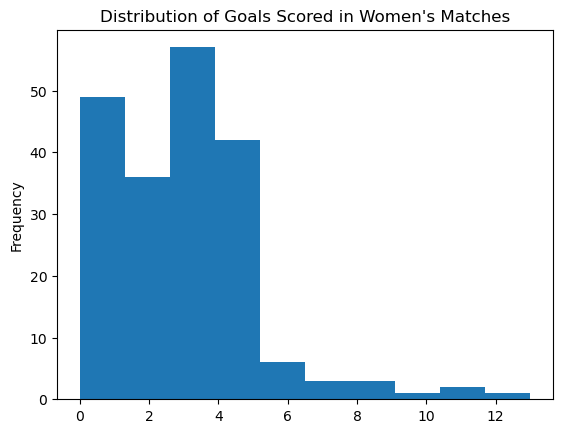

In [39]:
# Calculate the total number of goals score in each match in men_df
women_df['total_goals'] = women_df['home_score'] + women_df['away_score']

# Plot histogram for men_df
women_df['total_goals'].plot.hist()
plt.title("Distribution of Goals Scored in Women's Matches")